In [52]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
#from sklearn.preprocessing import LabelEncoder

In [53]:
calories=pd.read_csv('calories.csv')
exercise=pd.read_csv('exercise.csv')

In [54]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [55]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [56]:
data=pd.concat([exercise,calories['Calories']],axis=1)

In [57]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [58]:
data.shape

(15000, 9)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [60]:
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [61]:
data.isnull().count()

User_ID       15000
Gender        15000
Age           15000
Height        15000
Weight        15000
Duration      15000
Heart_Rate    15000
Body_Temp     15000
Calories      15000
dtype: int64

In [62]:
data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [64]:
data['Gender']

0          male
1        female
2          male
3        female
4        female
          ...  
14995    female
14996    female
14997    female
14998      male
14999      male
Name: Gender, Length: 15000, dtype: object

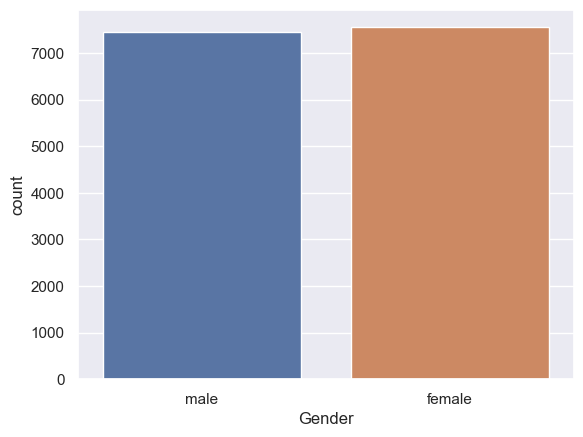

In [66]:
sns.countplot(data=data, x='Gender')
plt.show()

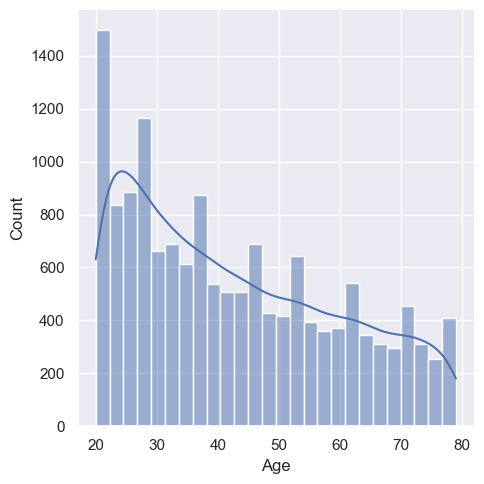

In [76]:
sns.displot(data['Age'],kde=True)
#sns.histplot(data['Age'])
plt.show()

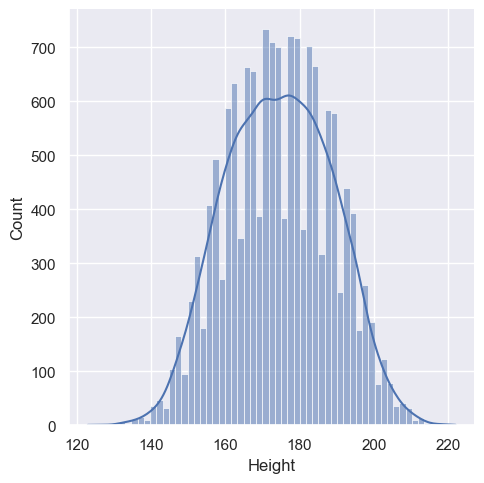

In [78]:
sns.displot(data['Height'],kde=True)

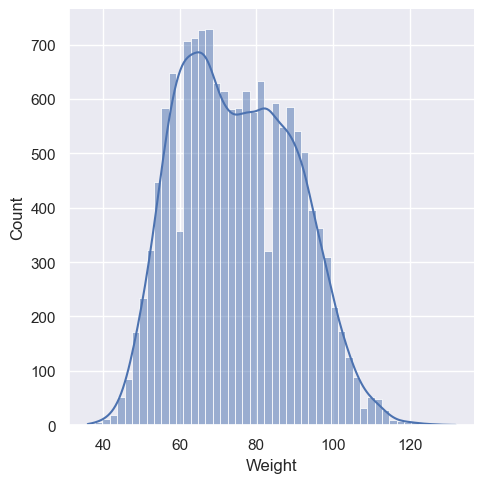

In [79]:
sns.displot(data['Weight'],kde=True)

In [81]:
correlation=data.corr(numeric_only=True)

In [82]:
correlation

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Age,-0.001827,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


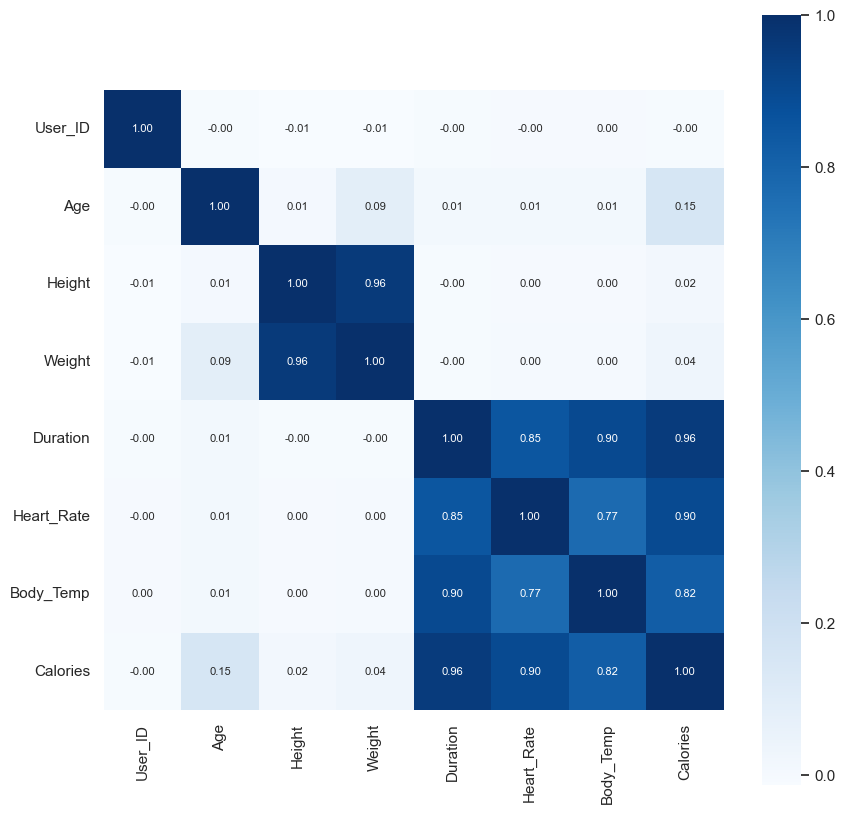

In [89]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size': 8}, cmap='Blues')
plt.show()

In [90]:
data.replace({'Gender':{'male':0,'female':1}},inplace=True)

In [91]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [93]:
X=data.drop(['Calories','User_ID'],axis=1)
Y=data['Calories']

In [94]:
X

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11.0,92.0,40.4
14996,1,27,165.0,65.0,6.0,85.0,39.2
14997,1,43,159.0,58.0,16.0,90.0,40.1
14998,0,78,193.0,97.0,2.0,84.0,38.3


In [95]:
Y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

In [96]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [97]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(12000, 7) (3000, 7) (12000,) (3000,)


In [98]:
model=XGBRegressor()

In [99]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [100]:
prediction=model.predict(X_test)

In [101]:
mae=metrics.mean_absolute_error(Y_test,prediction)

In [102]:
mae

1.4833678883314132

In [126]:
X_train.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp'],
      dtype='object')

In [127]:
X_train

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
1154,1,38,169.0,67.0,3.0,85.0,38.5
9804,0,30,194.0,96.0,9.0,91.0,39.6
7919,1,78,182.0,79.0,7.0,84.0,39.4
4854,0,50,171.0,77.0,29.0,111.0,40.8
5947,1,32,172.0,66.0,29.0,105.0,40.8
...,...,...,...,...,...,...,...
11798,1,49,178.0,71.0,12.0,98.0,39.9
13896,1,67,159.0,58.0,23.0,101.0,40.4
6637,1,25,167.0,64.0,20.0,100.0,40.4
2575,1,36,167.0,64.0,28.0,108.0,40.8


In [132]:
model.predict(np.array([[1, 38, 169.0, 67.0, 3.0, 85.0, 38.5]]))

array([11.680271], dtype=float32)

In [136]:
def predicting(values):
    return model.predict(np.array([values]))

In [138]:
print(predicting([1,78,182.0,79.0,7.0,84.0,39.4]))

[31.747328]


In [139]:
Y_train

1154      12.0
9804      37.0
7919      31.0
4854     222.0
5947     174.0
         ...  
11798     66.0
13896    145.0
6637     108.0
2575     180.0
7336      44.0
Name: Calories, Length: 12000, dtype: float64